<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Mbuya%20-%20Dimensionality%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimensionality Reduction in Machine Learning**

**Import Libraries**

In [81]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load the data**

In [82]:
data = pd.read_csv("Diabetes health indicators Binary.csv", sep=',', on_bad_lines='skip')

In [83]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [84]:
data.shape

(116984, 22)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116984 entries, 0 to 116983
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       116984 non-null  float64
 1   HighBP                116984 non-null  float64
 2   HighChol              116984 non-null  float64
 3   CholCheck             116984 non-null  float64
 4   BMI                   116984 non-null  float64
 5   Smoker                116984 non-null  float64
 6   Stroke                116984 non-null  float64
 7   HeartDiseaseorAttack  116984 non-null  float64
 8   PhysActivity          116984 non-null  float64
 9   Fruits                116984 non-null  float64
 10  Veggies               116984 non-null  float64
 11  HvyAlcoholConsump     116984 non-null  float64
 12  AnyHealthcare         116984 non-null  float64
 13  NoDocbcCost           116984 non-null  float64
 14  GenHlth               116983 non-null  float64
 15  

**Drop null from target var, and Convert data to Float**

In [86]:
data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116983 entries, 0 to 116982
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       116983 non-null  float64
 1   HighBP                116983 non-null  float64
 2   HighChol              116983 non-null  float64
 3   CholCheck             116983 non-null  float64
 4   BMI                   116983 non-null  float64
 5   Smoker                116983 non-null  float64
 6   Stroke                116983 non-null  float64
 7   HeartDiseaseorAttack  116983 non-null  float64
 8   PhysActivity          116983 non-null  float64
 9   Fruits                116983 non-null  float64
 10  Veggies               116983 non-null  float64
 11  HvyAlcoholConsump     116983 non-null  float64
 12  AnyHealthcare         116983 non-null  float64
 13  NoDocbcCost           116983 non-null  float64
 14  GenHlth               116983 non-null  float64
 15  

### **Data Description**

In [87]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,...,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000,116983.000000
mean,0.136721,0.427079,0.427643,0.963653,28.404178,0.446997,0.040493,0.092466,0.764043,0.641717,...,0.952626,0.080106,2.491362,3.142431,4.187138,0.163160,0.440072,8.060145,5.090235,6.132669
std,0.343554,0.494656,0.494739,0.187153,7.037609,0.497185,0.197113,0.289684,0.424597,0.479498,...,0.212439,0.271458,1.064788,7.301410,8.632192,0.369514,0.496398,3.043145,0.975462,2.047426
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### **Class Distribution**

**Explore the class distribution**

In [88]:
class_counts = data['Diabetes_binary'].value_counts()
print(class_counts)

0.0    100989
1.0     15994
Name: Diabetes_binary, dtype: int64


**Visualize the class distribution**

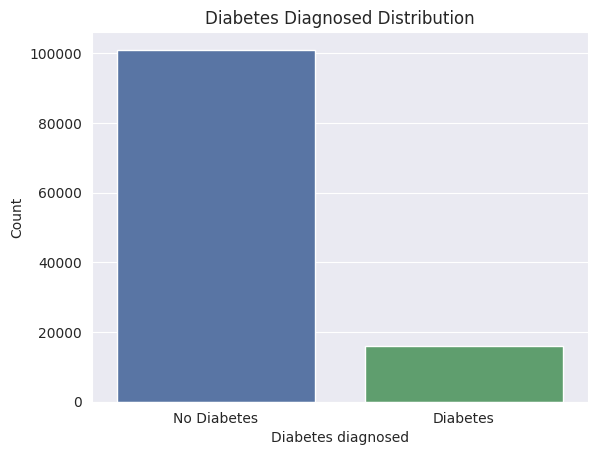

In [89]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes_binary'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes diagnosed')
plt.ylabel('Count')
plt.title('Diabetes Diagnosed Distribution')
plt.show()

### **Standardizing**

In [90]:
data_x = data.drop(["Diabetes_binary"], axis=1)
data_y = data['Diabetes_binary']

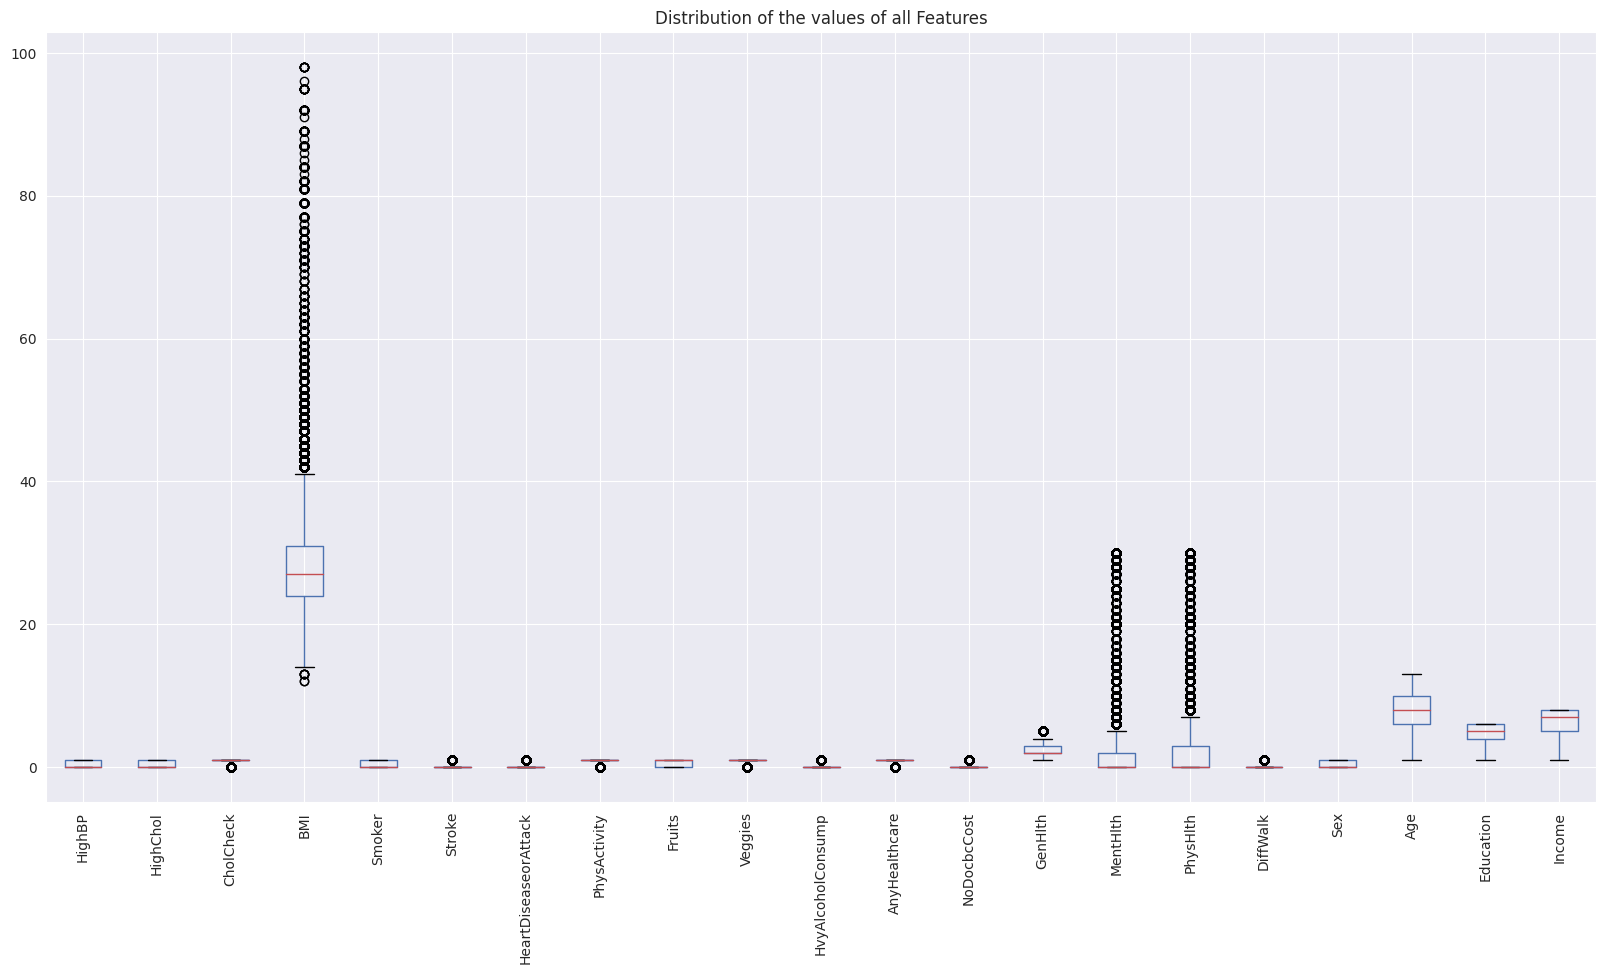

In [91]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

- We observe a large Scale difference between variables. We need to standardize them to avoid those with large scales wrongly have too much weight in the calculations.

- Standardizing a dataset is necessary in several situations to ensure fair and meaningful comparisons and analyses

-  Because we going to apply PCA we need to standardize the data.
  - PCA aims to capture the most variance in the data. If features are on different scales, those with larger scales will contribute more to the variance, potentially overshadowing important patterns present in smaller-scaled features.

**Standardize the feature columns**

In [92]:

scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [93]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.158226,1.156891,0.194212,1.647700,1.112274,-0.205431,-0.319198,-1.799459,-1.338317,0.476927,...,0.223003,-0.295096,2.356008,2.034899,1.252626,2.264715,-0.886536,0.308844,-1.117665,-1.530059
1,-0.863390,-0.864386,-5.149026,-0.483714,1.112274,-0.205431,-0.319198,0.555722,-1.338317,-2.096758,...,-4.484244,3.388733,0.477692,-0.430389,-0.485063,-0.441557,-0.886536,-0.348373,0.932654,-2.506900
2,1.158226,1.156891,0.194212,-0.057431,-0.899059,-0.205431,-0.319198,-1.799459,0.747207,-2.096758,...,0.223003,3.388733,2.356008,3.678424,2.990315,2.264715,-0.886536,0.308844,-1.117665,0.912042
3,1.158226,-0.864386,0.194212,-0.199526,-0.899059,-0.205431,-0.319198,0.555722,0.747207,0.476927,...,0.223003,-0.295096,-0.461467,-0.430389,-0.485063,-0.441557,-0.886536,0.966062,-2.142824,-0.064798
4,1.158226,1.156891,0.194212,-0.625809,-0.899059,-0.205431,-0.319198,0.555722,0.747207,0.476927,...,0.223003,-0.295096,-0.461467,-0.019507,-0.485063,-0.441557,-0.886536,0.966062,-0.092506,-1.041639


**Marge the data back**

In [94]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [95]:
std_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.158226,1.156891,0.194212,1.647700,1.112274,-0.205431,-0.319198,-1.799459,-1.338317,0.476927,...,-0.295096,2.356008,2.034899,1.252626,2.264715,-0.886536,0.308844,-1.117665,-1.530059,0.0
1,-0.863390,-0.864386,-5.149026,-0.483714,1.112274,-0.205431,-0.319198,0.555722,-1.338317,-2.096758,...,3.388733,0.477692,-0.430389,-0.485063,-0.441557,-0.886536,-0.348373,0.932654,-2.506900,0.0
2,1.158226,1.156891,0.194212,-0.057431,-0.899059,-0.205431,-0.319198,-1.799459,0.747207,-2.096758,...,3.388733,2.356008,3.678424,2.990315,2.264715,-0.886536,0.308844,-1.117665,0.912042,0.0
3,1.158226,-0.864386,0.194212,-0.199526,-0.899059,-0.205431,-0.319198,0.555722,0.747207,0.476927,...,-0.295096,-0.461467,-0.430389,-0.485063,-0.441557,-0.886536,0.966062,-2.142824,-0.064798,0.0
4,1.158226,1.156891,0.194212,-0.625809,-0.899059,-0.205431,-0.319198,0.555722,0.747207,0.476927,...,-0.295096,-0.461467,-0.019507,-0.485063,-0.441557,-0.886536,0.966062,-0.092506,-1.041639,0.0


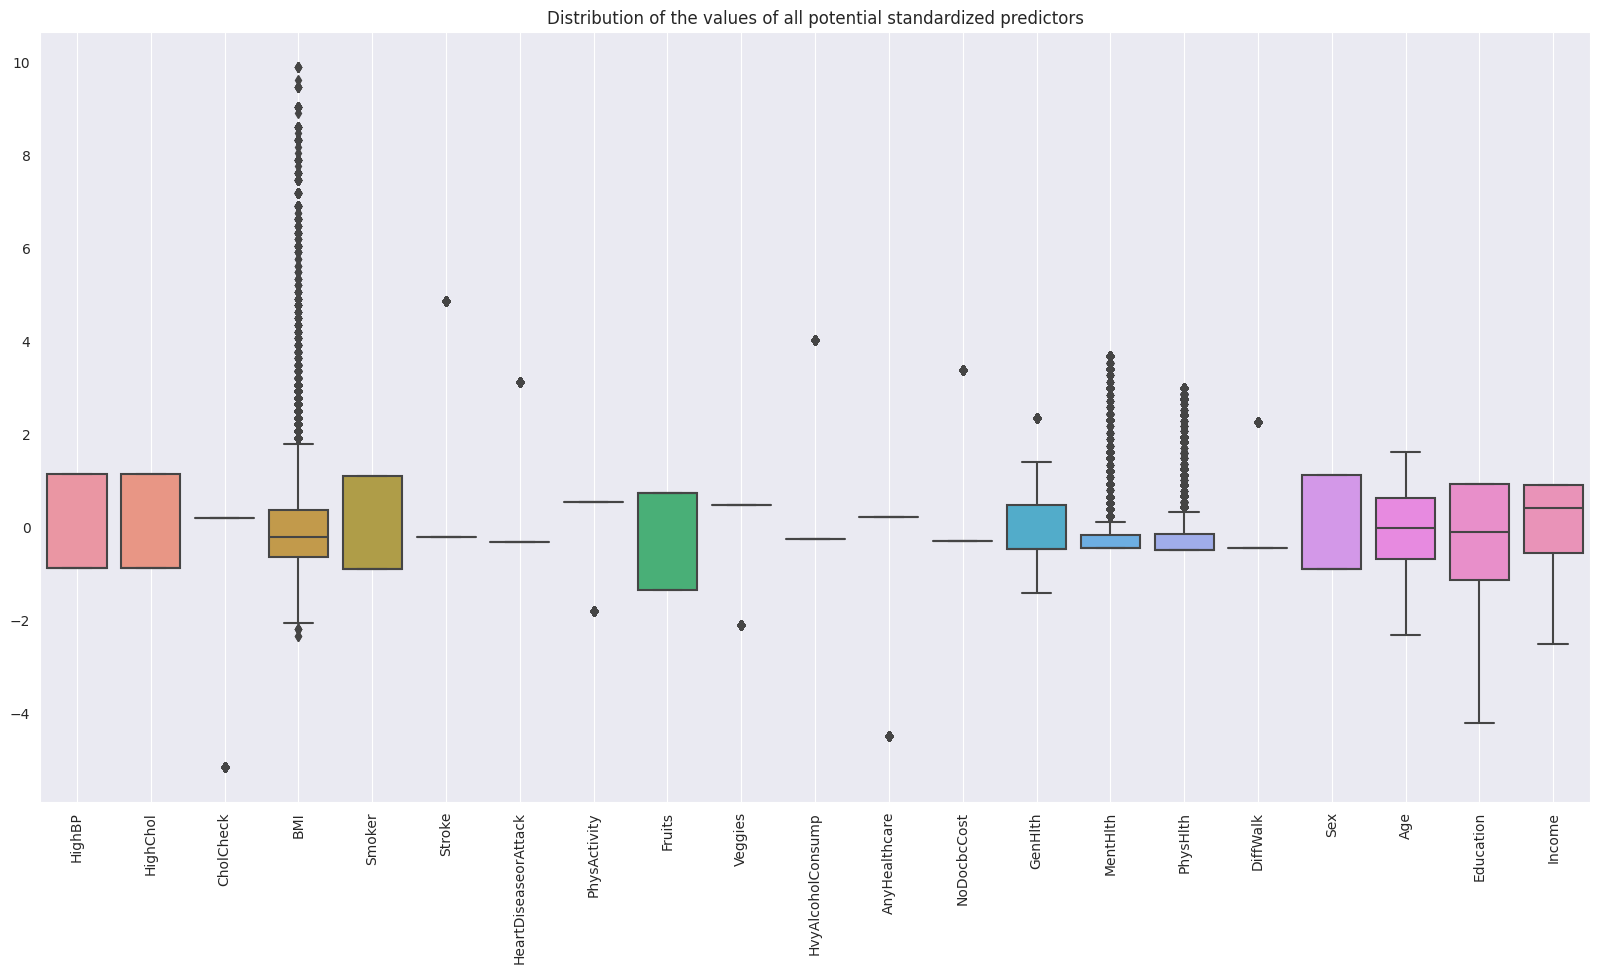

In [96]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-1])
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

looks better with standardization

###**Correlation**

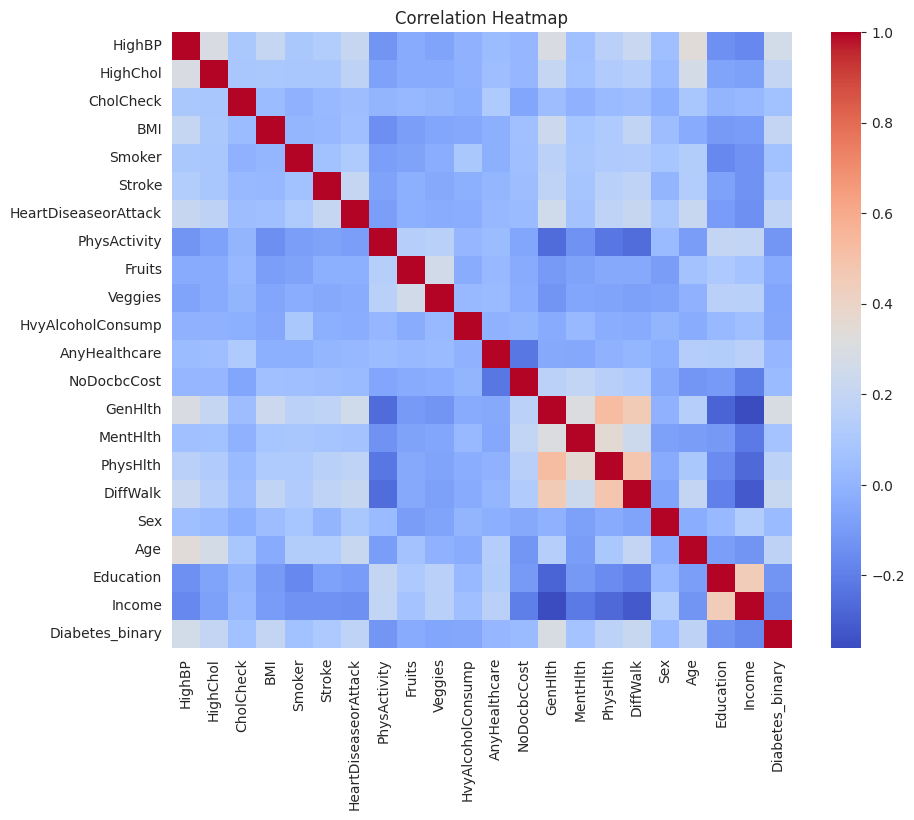

In [97]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### **Dimensionality Reduction**

**Split Dataset**

In [98]:
X = std_df.iloc[:,:-1]
y = std_df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
print(X_train.shape)

(93586, 21)


In [100]:
print(X_test.shape)

(23397, 21)


**baseline model**

In [101]:
# Train a Random Forest model using the original features
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Make predictions on the test set
baseline_predictions = rf_baseline.predict(X_test)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, baseline_predictions)
precision = precision_score(y_test, baseline_predictions)
recall = recall_score(y_test, baseline_predictions)
f1 = f1_score(y_test, baseline_predictions)
roc_auc = roc_auc_score(y_test, baseline_predictions)
confusion = confusion_matrix(y_test, baseline_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, baseline_predictions)

# Print the baseline accuracy
print(f"--- Baseline Model ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)

--- Baseline Model ---
Accuracy: 0.86
Precision: 0.48
Recall: 0.16
F1 Score: 0.24
ROC AUC: 0.57
Balanced Accuracy: 0.57
Confusion Matrix:
[[19675   549]
 [ 2670   503]]




**Principal Component Analysis (PCA)**

*Determining the number of principal components **(n_components)** for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.*

***There are several methods you can use to decide on the appropriate number of components:***

**1. Scree Plot**

*Plot the explained variance ratio against the number of components. The "elbow point" in the scree plot is often chosen as the number of components to keep. It's where adding more components doesn't significantly increase the explained variance.*



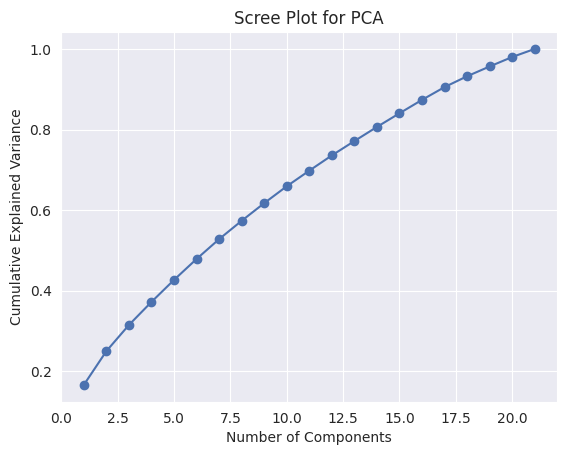

In [102]:
pca = PCA()
pca.fit(X_train)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.show()

**2. Cross Validation**


*Using cross-validation to determine the number of components for PCA involves evaluating the performance of your model using different numbers of components and selecting the number that gives the best performance.*

In [103]:
# Use standardized dataset 'std_data' and corresponding target 'data_y'
n_components_range = range(1, len(std_data.columns) + 1)  # Range of possible n_components values

# Initialize an empty list to store cross-validation scores
cross_val_scores = []

# Loop through different n_components values
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(std_data)

    # Use a model of your choice (e.g., LogisticRegression) for cross-validation
    model = LogisticRegression()  # Replace with your preferred model
    scores = cross_val_score(model, X_pca, data_y, cv=5)  # 5-fold cross-validation
    cross_val_scores.append(np.mean(scores))

# Find the n_components that gives the best cross-validation score
best_n_components = n_components_range[np.argmax(cross_val_scores)]

print(f"Best n_components: {best_n_components}")

Best n_components: 9


In [104]:
pca=PCA(n_components=9) # split in 9 components

X_train_pca = pca.fit_transform(X_train)

factors_Df = pd.DataFrame(data = X_train_pca, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

factors_Df.index=X_train.index

In [105]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
87418,2.101364,-0.257875,-1.631483,-1.616268,-1.649437,-0.397756,0.587489,-0.353223,1.764686
86759,-2.486786,-0.191627,1.215030,-0.220083,-0.530487,-0.158779,-0.386096,-0.127718,0.184344
67098,3.963750,3.480356,-0.077478,-3.304593,-0.149341,-1.568826,0.122001,0.492040,-0.692140
98105,-2.010641,0.633506,0.127176,-1.265288,-0.273853,-0.219599,-0.383954,-0.414783,0.375730
22385,3.291638,1.409448,0.649122,-1.981655,0.409656,0.070740,-0.375312,-0.373106,-1.031710


***The lines of code below, Calculate and print various metrics related to the explained variance in a PCA analysis***

- **Line 1:** *The first line prints the explained variance ratio for each principal component. The explained variance ratio indicates the proportion of the total variance in the data that each principal component accounts for. Each value in the printed array represents the percentage of variance explained by the corresponding principal component.*

- **Line 2:** *The second line calculates and prints the cumulative explained variance ratio. It shows the cumulative proportion of the total variance explained by the principal components in increasing order.*

- **Line 3:** *This line prints the sum of all the explained variance ratios. This value should be equal to 1 (or very close to it) since the sum of the explained variance ratios should account for all the variance in the original data.*

*Together, these lines of code provide insights into how much information is retained by each principal component and the cumulative information retained as you consider more components. It helps you decide how many principal components you need to keep to retain a sufficient amount of information while reducing dimensionality. This is essential for determining the appropriate number of components to include in your PCA transformation, which can aid in feature selection, noise reduction, and model efficiency.*

In [106]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[0.16613695 0.08386364 0.06487771 0.05716854 0.0545583  0.0518784
 0.04922892 0.04549472 0.04376687]

[0.16613695 0.25000059 0.3148783  0.37204684 0.42660515 0.47848355
 0.52771247 0.57320719 0.61697406]

0.616974062588636


**Visualization of the explained variance**

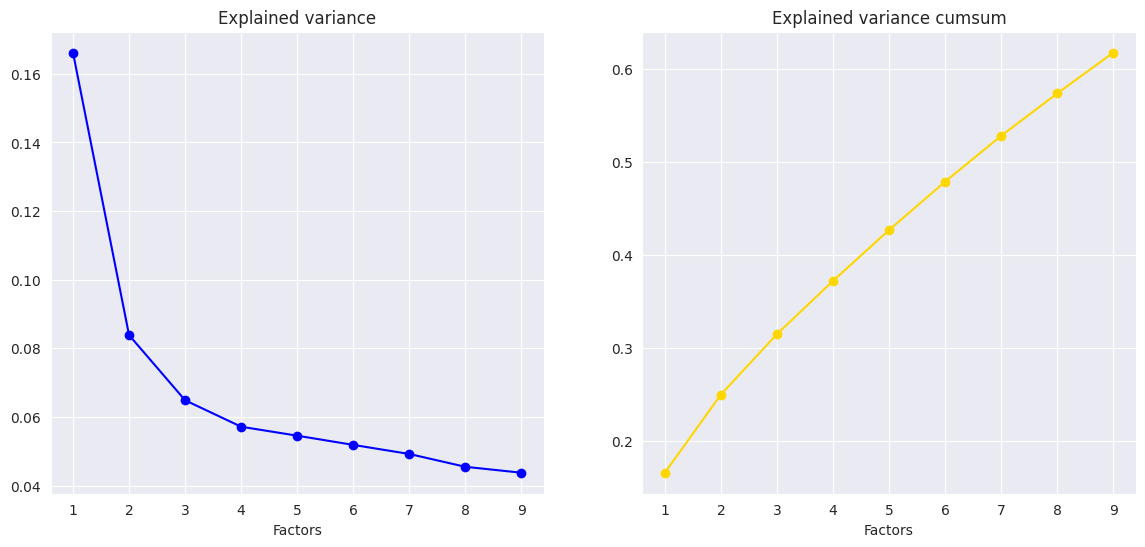

In [107]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,10),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,10),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

**The shared inertia explained by the first 9 components is around 62%**

The statement "The shared inertia explained by the first 9 components is around 62%" indicates that the cumulative variance captured by the first 9 principal components in a Principal Component Analysis (PCA) is approximately 62%.

Whether this is considered good or bad depends on the context of your analysis and the goals you have set. Here's how to interpret it:

1. **Good:**
   - If your goal is dimensionality reduction, and you're looking to retain a significant portion of the original data's variance while reducing the number of features, achieving 62% explained variance with just 9 components could be considered good.
   - If the original dataset is very high-dimensional, retaining 62% of the variability with 9 components might allow for a substantial reduction in complexity without sacrificing too much information.

2. **Not Ideal:**
   - If your analysis or model requires capturing a high percentage of the data's variance, achieving only 62% might not be ideal. In some cases, you might need a higher percentage of variance explained for accurate predictions or meaningful insights.
   - If the original dataset is not too large and you can afford to keep more components, you might aim for a higher explained variance percentage.

3. **Context Matters:**
   - The decision of what is "good" or "bad" depends on the specific problem you're working on. Some applications require very high explained variance, while others can work well with less.

In summary, whether an explained variance of around 62% with the first 9 components is good or bad depends on the trade-offs you're willing to make between dimensionality reduction and retaining the variability needed for your analysis or modeling purposes. It's a balance that needs to be considered within the context of your project's goals and requirements.

### **Predictive analysis**

In [108]:
X_test_pca = pca.transform(X_test)

# Train a Random Forest model using PCA-transformed features
rf_pca = RandomForestClassifier(random_state=42)  # You can adjust parameters as needed
rf_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
pca_predictions = rf_pca.predict(X_test_pca)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, pca_predictions)
precision = precision_score(y_test, pca_predictions)
recall = recall_score(y_test, pca_predictions)
f1 = f1_score(y_test, pca_predictions)
roc_auc = roc_auc_score(y_test, pca_predictions)
confusion = confusion_matrix(y_test, pca_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, pca_predictions)

# Print the PCA model accuracy
print(f"--- PCA-Transformed Features Model ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC: {:.2f}".format(roc_auc))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- PCA-Transformed Features Model ---
Accuracy: 0.86
Precision: 0.51
Recall: 0.15
F1 Score: 0.23
ROC AUC: 0.56
Balanced Accuracy: 0.56
Confusion Matrix:
[[19766   458]
 [ 2704   469]]


